In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
doge_df = pd.read_csv(Path('../../resources/prices/coin_Dogecoin.csv'), index_col='SNo')
doge_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...
2627,Dogecoin,DOGE,2021-02-23 23:59:59,0.053768,0.042410,0.053698,0.047392,2.394345e+09,6.089686e+09
2628,Dogecoin,DOGE,2021-02-24 23:59:59,0.059873,0.046216,0.047414,0.056555,4.148512e+09,7.267918e+09
2629,Dogecoin,DOGE,2021-02-25 23:59:59,0.057808,0.049869,0.056615,0.050167,2.356982e+09,6.447665e+09


In [4]:
doge_df['Date'] = pd.to_datetime(doge_df['Date']).dt.date
doge_df['Date'] = pd.to_datetime(doge_df['Date'])
doge_df['Spread'] = doge_df.High - doge_df.Low
doge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 1 to 2631
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2631 non-null   object        
 1   Symbol     2631 non-null   object        
 2   Date       2631 non-null   datetime64[ns]
 3   High       2631 non-null   float64       
 4   Low        2631 non-null   float64       
 5   Open       2631 non-null   float64       
 6   Close      2631 non-null   float64       
 7   Volume     2631 non-null   float64       
 8   Marketcap  2631 non-null   float64       
 9   Spread     2631 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 226.1+ KB


## Plot the closing value of Dogecoin over time

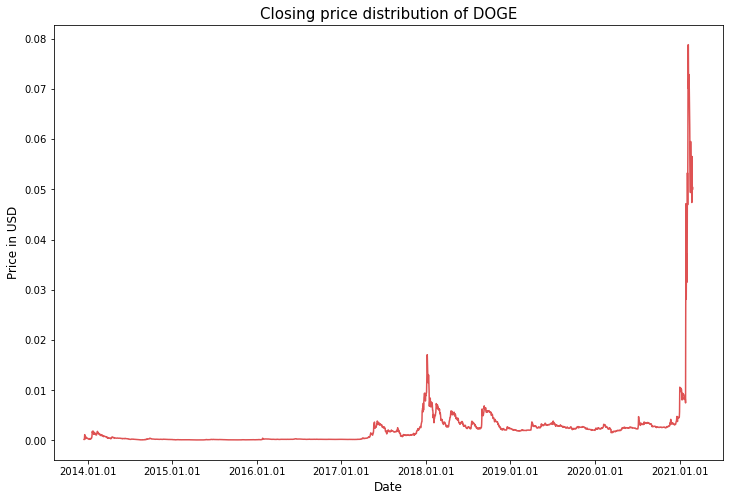

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = doge_df.Close.values, x=doge_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = doge_df.Close.values, x=doge_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of DOGE", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

doge_df['Date_mpl'] = doge_df['Date'].apply(lambda x: mdates.date2num(x))

temp_doge_df = doge_df.copy(deep=False)
temp_doge_df = temp_doge_df.set_index(['Date'])
temp_doge_df = temp_doge_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_doge_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2013-12-16,0.000866,0.000150,0.000299,0.000205,0.000000e+00,16055.0
2013-12-17,0.000289,0.000116,0.000207,0.000269,0.000000e+00,16056.0
2013-12-18,0.000362,0.000205,0.000267,0.000362,0.000000e+00,16057.0
2013-12-19,0.001520,0.000328,0.000395,0.001162,0.000000e+00,16058.0
2013-12-20,0.001143,0.000662,0.001143,0.000704,0.000000e+00,16059.0
...,...,...,...,...,...,...
2021-02-23,0.053768,0.042410,0.053698,0.047392,2.394345e+09,18681.0
2021-02-24,0.059873,0.046216,0.047414,0.056555,4.148512e+09,18682.0
2021-02-25,0.057808,0.049869,0.056615,0.050167,2.356982e+09,18683.0


/Users/arttucker/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


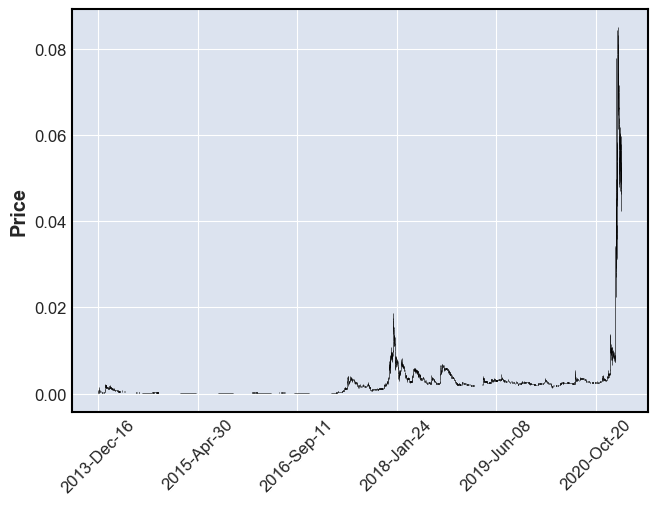

In [7]:
mpf.plot(temp_doge_df, type='candle')

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_Dogecoin.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2656,2021-03-25 23:59:59,0.013615,0.007478,0.019961
2657,2021-03-26 23:59:59,0.013703,0.007669,0.019827
2658,2021-03-27 23:59:59,0.013769,0.008190,0.020267
2659,2021-03-28 23:59:59,0.013798,0.007646,0.020319
2660,2021-03-29 23:59:59,0.013801,0.007360,0.019656


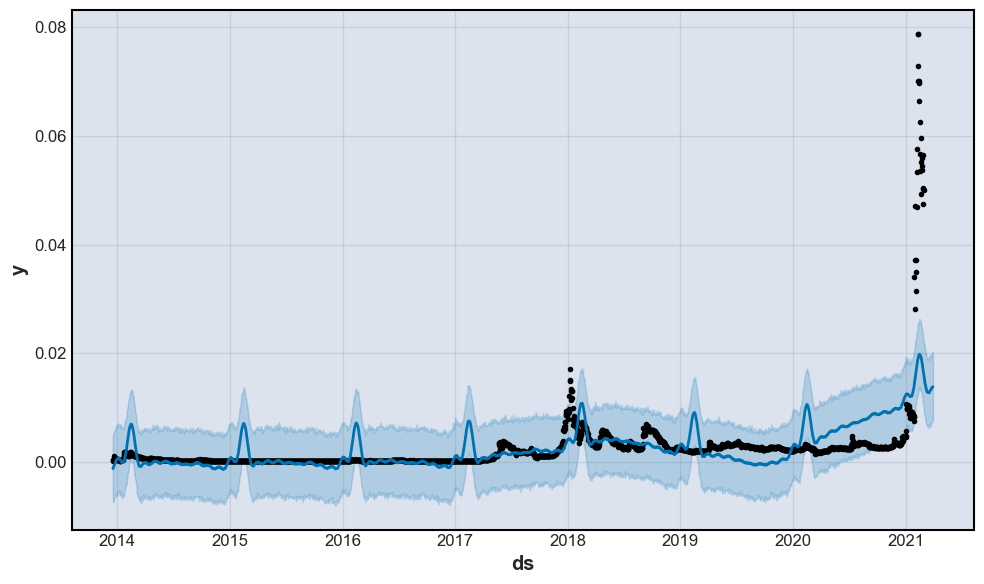

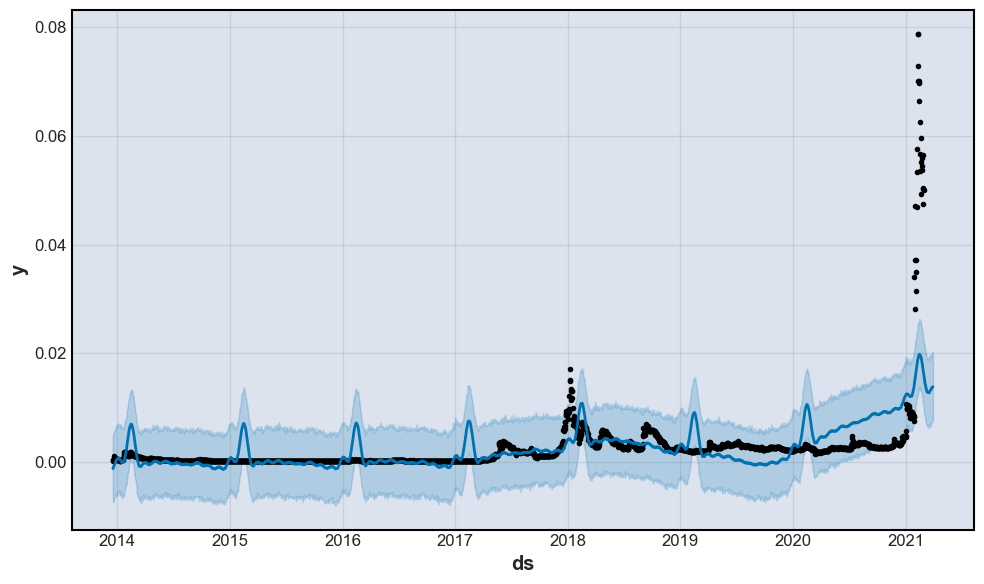

In [10]:
m.plot(forecast)

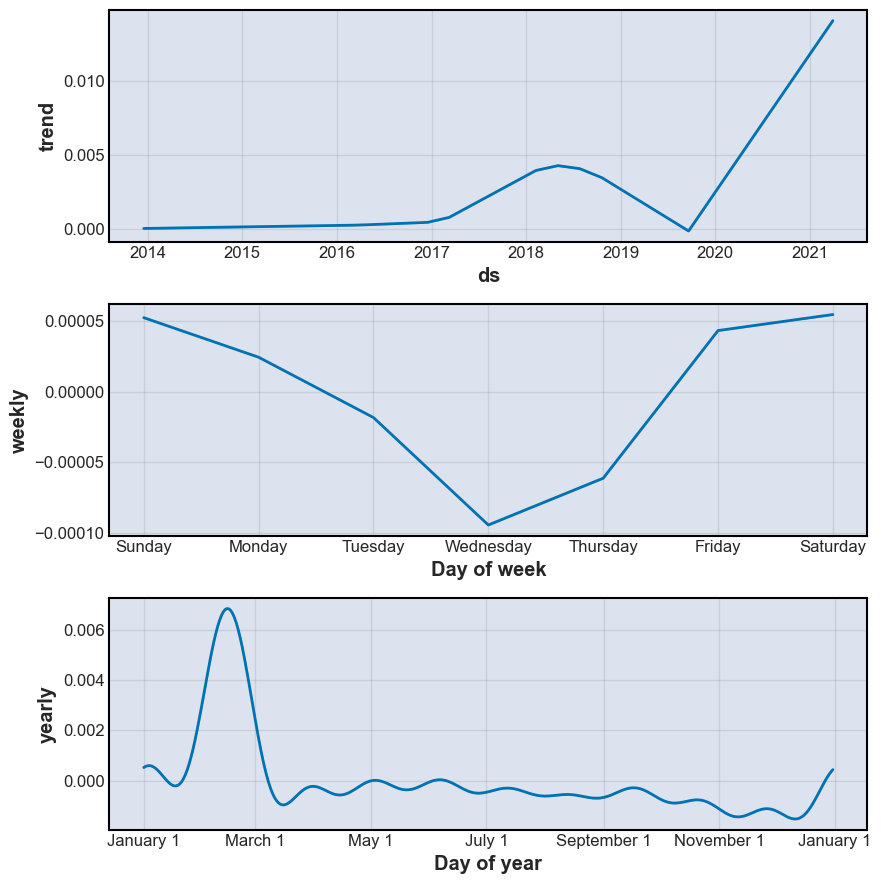

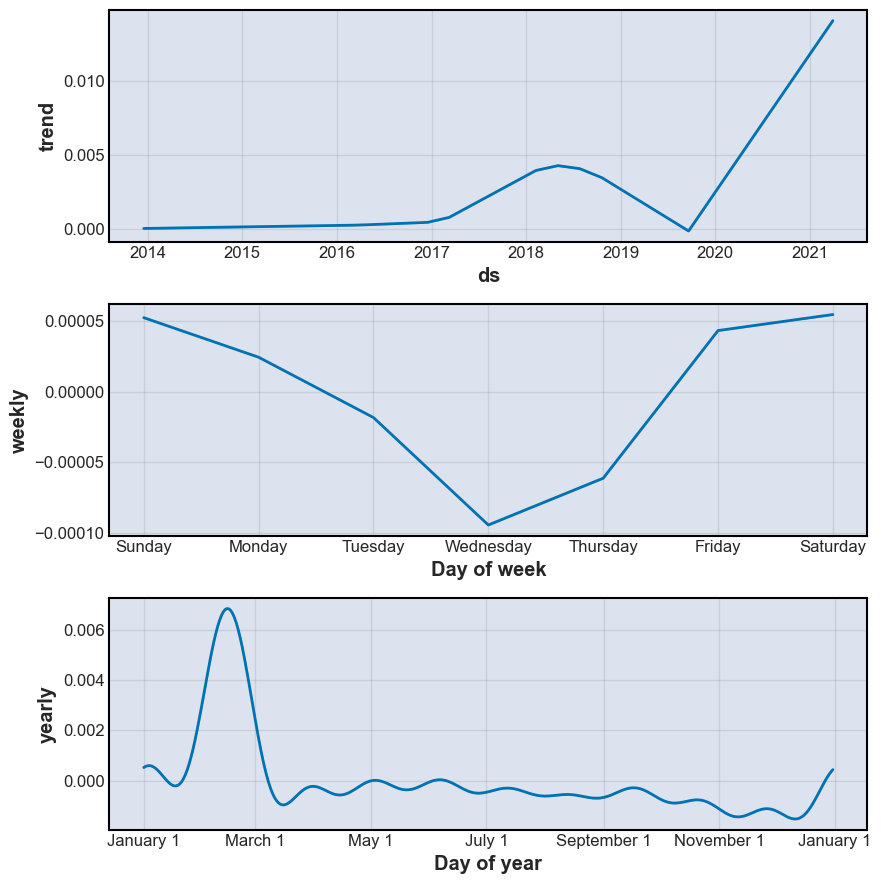

In [11]:
m.plot_components(forecast)